In [1]:
#Load data
import pandas as pd

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')



In [2]:
#Drop features we are not going to use
train = train.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
test = test.drop(['Name','SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)

#Look at the first 3 rows of our training data
train.head(3)

PassengerId  Survived  Pclass     Sex   Age
0            1         0       3    male  22.0
1            2         1       1  female  38.0
2            3         1       3  female  26.0

In [5]:
train.corr()

PassengerId  Survived    Pclass       Age
PassengerId     1.000000 -0.005007 -0.035144  0.036847
Survived       -0.005007  1.000000 -0.338481 -0.077221
Pclass         -0.035144 -0.338481  1.000000 -0.369226
Age             0.036847 -0.077221 -0.369226  1.000000

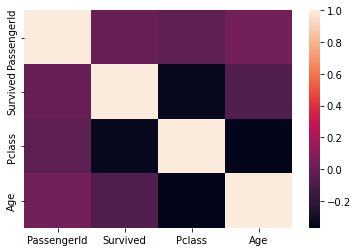

In [7]:
import seaborn
seaborn.heatmap(train.corr())

In [8]:
# Checking for null values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
dtype: int64

In [10]:
train.shape

(891, 5)

In [11]:
#Convert ['male','female'] to [1,0] so that our decision tree can be built
for df in [train,test]:
    df['Sex_binary']=df['Sex'].map({'male':1,'female':0})
    
#Fill in missing age values with 0 (presuming they are a baby if they do not have a listed age)
train['Age'] = train['Age'].fillna(0)
test['Age'] = test['Age'].fillna(0)

#Select feature column names and target variable we are going to use for training
features = ['Pclass','Age','Sex_binary']
target = 'Survived'

#Look at the first 3 rows (we have over 800 total rows) of our training data.; 
#This is input which our classifier will use as an input.
train[features].head(3)

Pclass   Age  Sex_binary
0       3  22.0           1
1       1  38.0           0
2       3  26.0           0

In [12]:
#Display first 3 target variables
train[target].head(3).values

array([0, 1, 1])

In [13]:
from sklearn.tree import DecisionTreeClassifier

#Create classifier object with default hyperparameters
clf = DecisionTreeClassifier()  

#Fit our classifier using the training features and the training target values
clf.fit(train[features],train[target]) 
clf.score(train[features],train[target])

0.8799102132435466

In [14]:
#Create decision tree ".dot" file

#Remove each '#' below to uncomment the two lines and export the file.
#from sklearn.tree import export_graphviz
#export_graphviz(clf,out_file='titanic_tree.dot',feature_names=features,rounded=True,filled=True,class_names=['Survived','Did not Survive'])

In [15]:
#Display decision tree

#Blue on a node or leaf means the tree thinks the person did not survive
#Orange on a node or leaf means that tree thinks that the person did survive

#In Chrome, to zoom in press control +. To zoom out, press control -. If you are on a Mac, use Command.

#Remove each '#' below to run the two lines below.
#from IPython.core.display import Image, display
#display(Image('titanic_tree.png', width=1900, unconfined=True))

In [16]:
#Make predictions using the features from the test data set
clf_predictions = clf.predict(test[features])

#Display our predictions - they are either 0 or 1 for each training instance 
#depending on whether our algorithm believes the person survived or not.
clf_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
clf_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':clf_predictions})

#Visualize the first 15 rows
clf_submission.head(15)

PassengerId  Survived
0           892         0
1           893         0
2           894         1
3           895         1
4           896         1
5           897         0
6           898         0
7           899         0
8           900         0
9           901         0
10          902         0
11          903         0
12          904         1
13          905         1
14          906         1

In [18]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions using decision tree.csv'

clf_submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions using decision tree.csv


In [19]:
#Random Forest Classifier(Highest Accuracy)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()  #create object
rfc.fit(train[features],train[target])
rfc.score(train[features],train[target])

0.8787878787878788

In [20]:
#Make predictions using the features from the test data set
rfc_predictions = rfc.predict(test[features])

#Display our predictions - they are either 0 or 1 for each training instance 
#depending on whether our algorithm believes the person survived or not.
rfc_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
rfc_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':rfc_predictions})

#Visualize the first 15 rows
rfc_submission.head(15)

PassengerId  Survived
0           892         0
1           893         0
2           894         1
3           895         1
4           896         1
5           897         0
6           898         0
7           899         0
8           900         0
9           901         0
10          902         0
11          903         0
12          904         1
13          905         1
14          906         1

In [22]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions using random forest.csv'

rfc_submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions using random forest.csv


In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train[features],train[target])
knn.score(train[features],train[target])

0.8316498316498316

In [24]:
#Make predictions using the features from the test data set
knn_predictions = knn.predict(test[features])

#Display our predictions - they are either 0 or 1 for each training instance 
#depending on whether our algorithm believes the person survived or not.
knn_predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
knn_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':knn_predictions})

#Visualize the first 15 rows
knn_submission.head(15)

PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         1
4           896         1
5           897         0
6           898         0
7           899         0
8           900         0
9           901         0
10          902         0
11          903         0
12          904         1
13          905         1
14          906         1

In [26]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions using knn.csv'

knn_submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions using knn.csv


In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(train[features],train[target])
log.score(train[features],train[target])

0.7833894500561167

In [28]:
#Make predictions using the features from the test data set
log_predictions = log.predict(test[features])

#Display our predictions - they are either 0 or 1 for each training instance 
#depending on whether our algorithm believes the person survived or not.
log_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
log_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':log_predictions})

#Visualize the first 15 rows
log_submission.head(15)

PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         1
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1

In [30]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'Titanic Predictions using logistic.csv'

log_submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions using logistic.csv
